In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.chdir('E:/Datasets/')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df.shape

(823, 19)

In [6]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

### Step 2: Data Quality Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [8]:
df.duplicated().sum()

21

### Drop the duplicates

In [9]:
df = df.drop_duplicates(keep='first')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [10]:
df.duplicated().sum()

0

### Categorical and Contineous feature seperation 

In [11]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [12]:
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [13]:
cat =list(df.columns[df.dtypes=='object'])
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [14]:
con = list(df.columns[df.dtypes!='object'])
con

['Price', 'Number of Ratings', 'Number of Reviews']

### Perform descriptive analytics for cat and con features

In [15]:
df[cat].describe().T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


In [16]:
df['os'].value_counts()

os
Windows    763
Mac         23
DOS         16
Name: count, dtype: int64

In [17]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


In [18]:
df['Price'].value_counts()

Price
64990     15
59990     14
79990     13
39990     12
99990     11
          ..
74500      1
53400      1
71090      1
111890     1
57490      1
Name: count, Length: 405, dtype: int64

### Perform Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

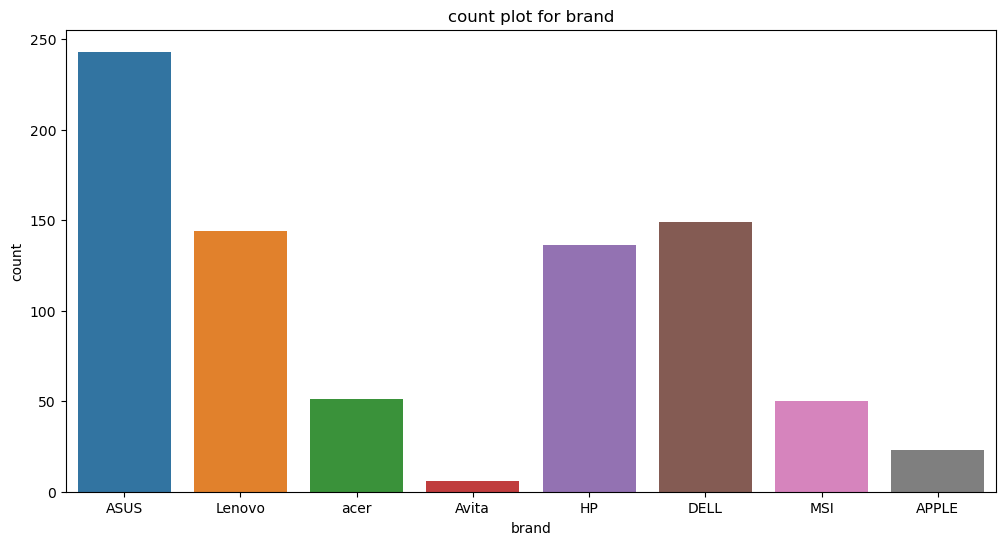

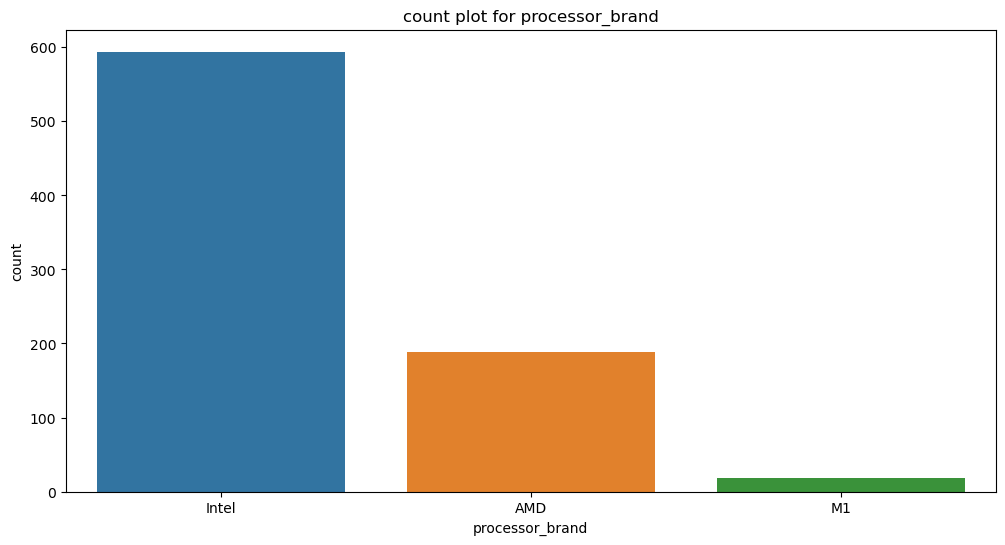

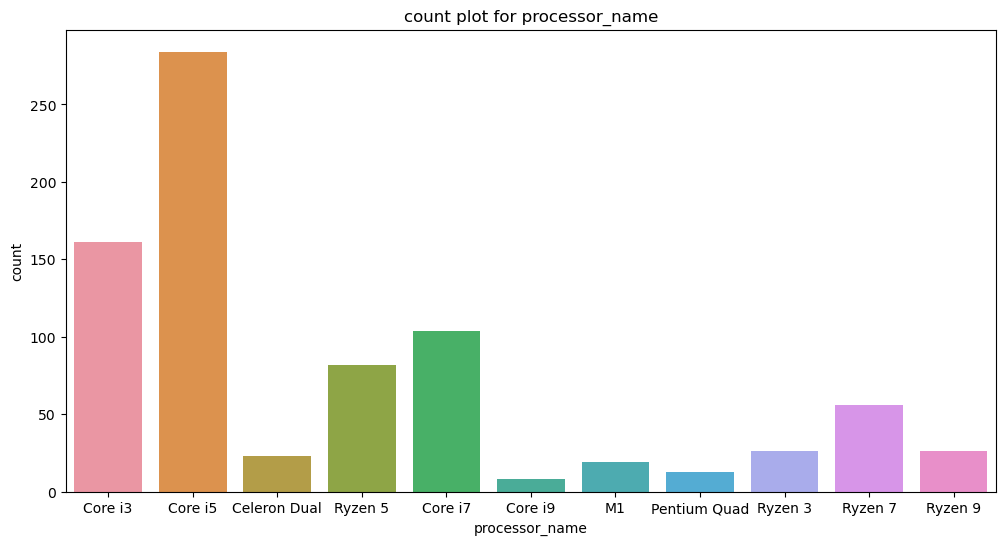

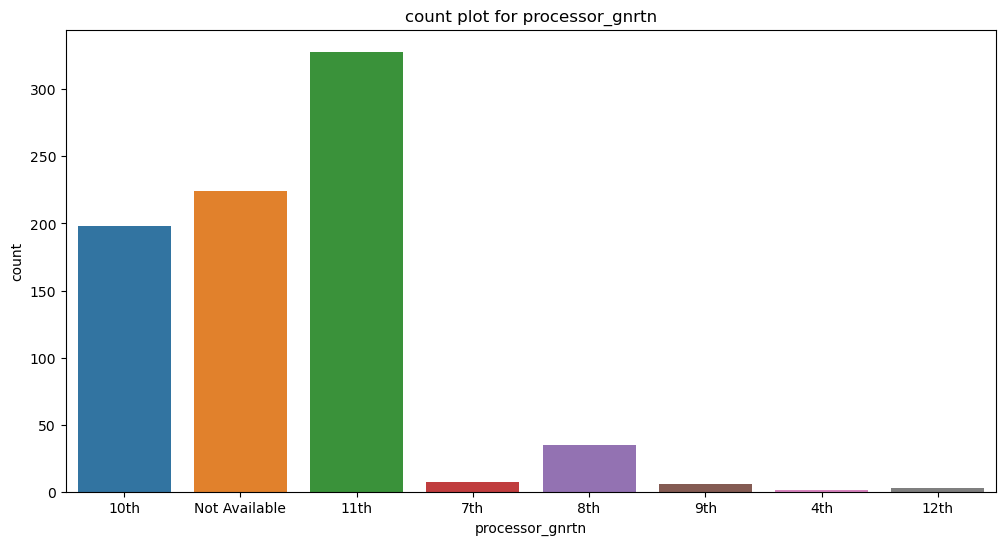

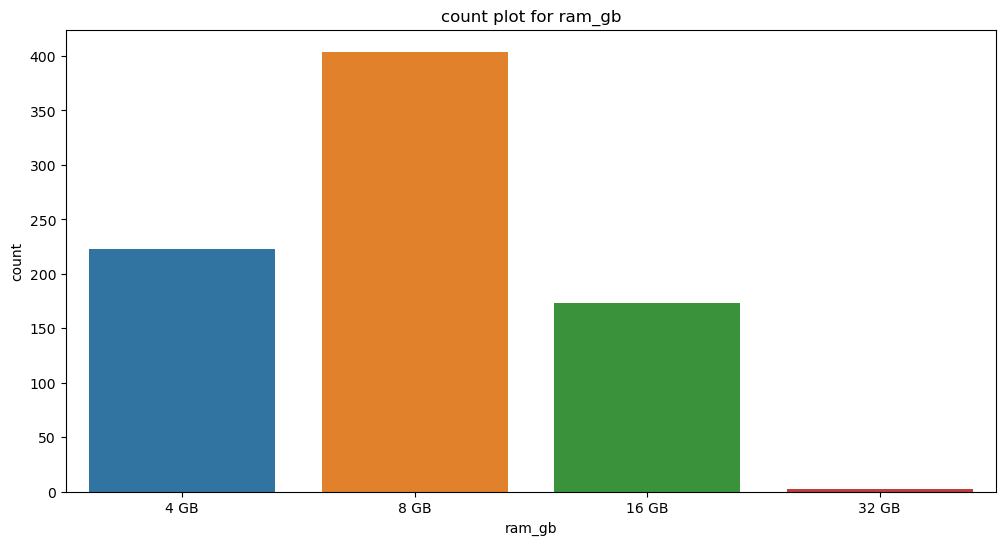

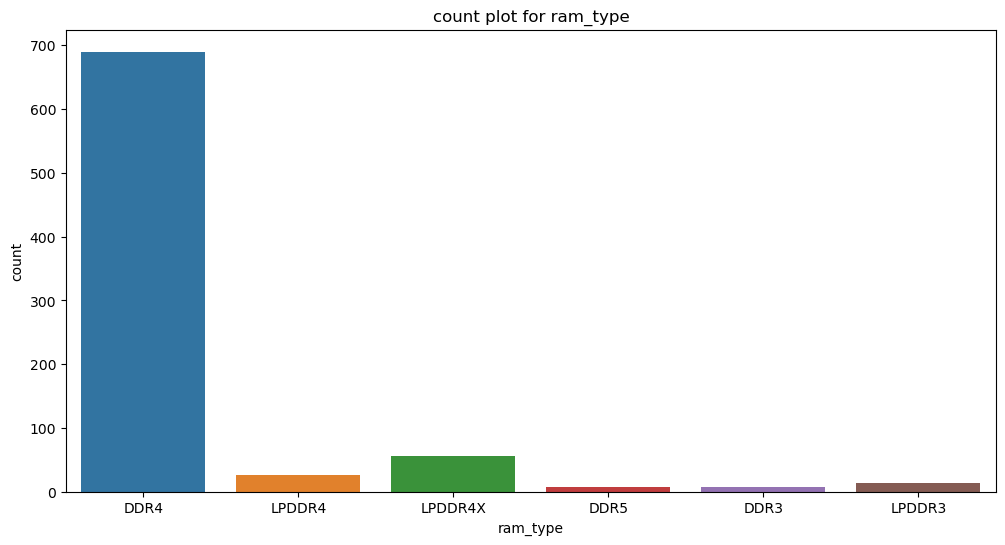

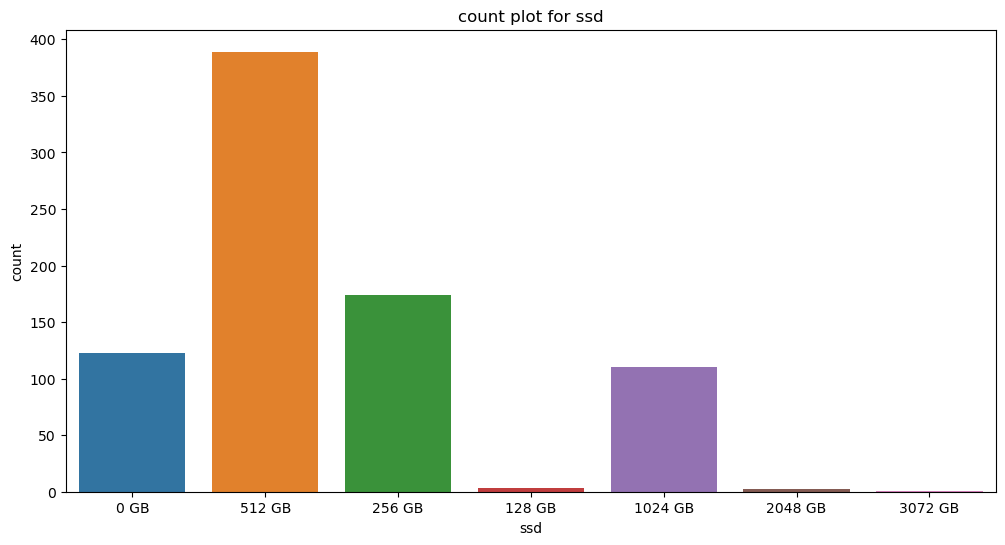

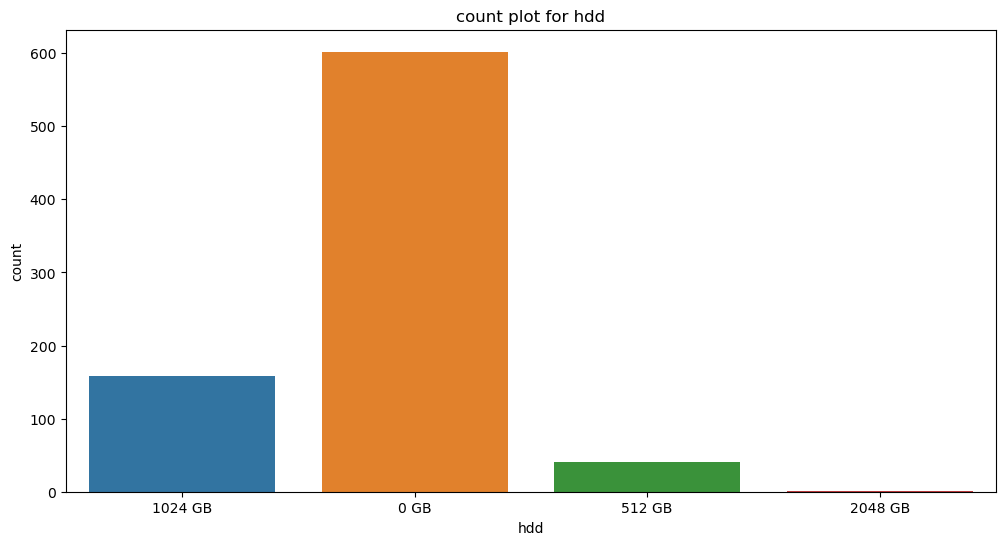

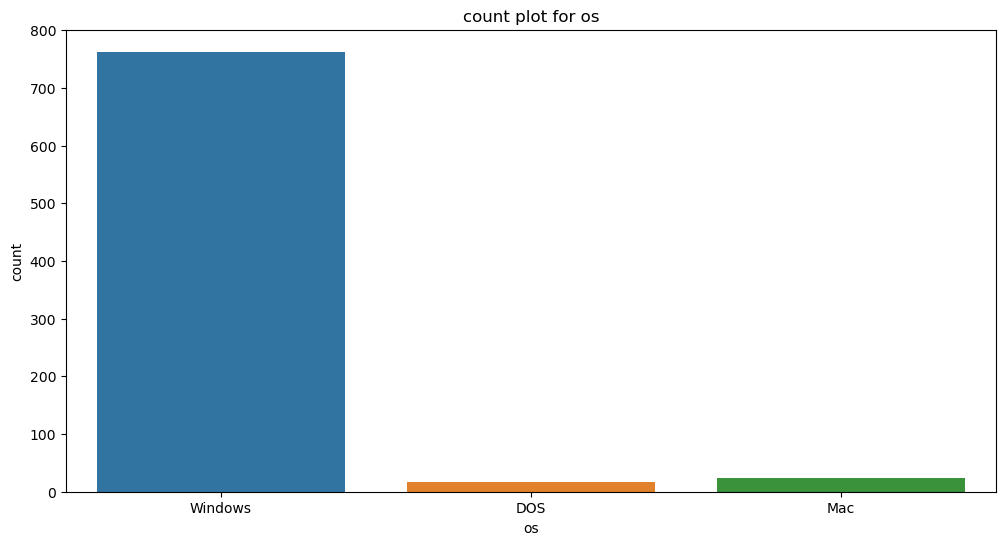

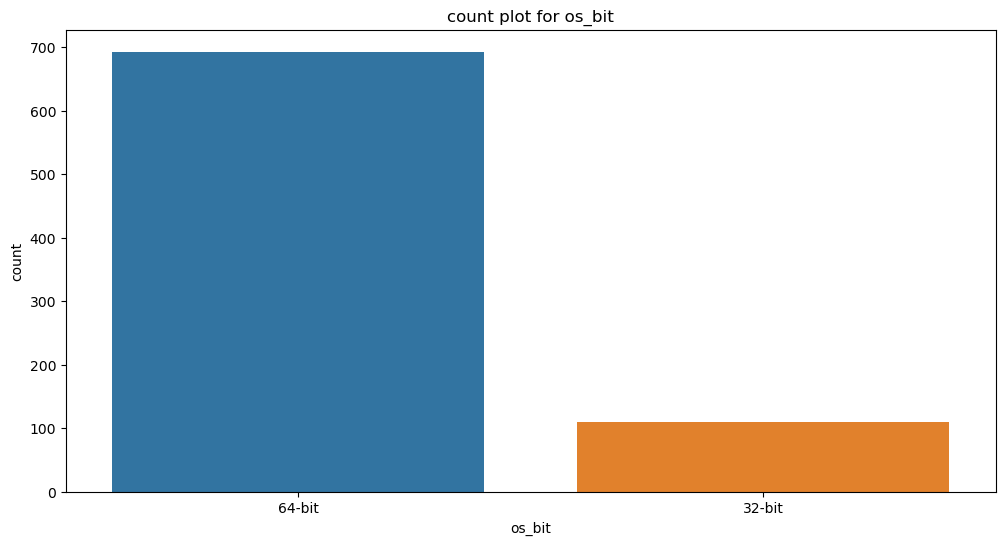

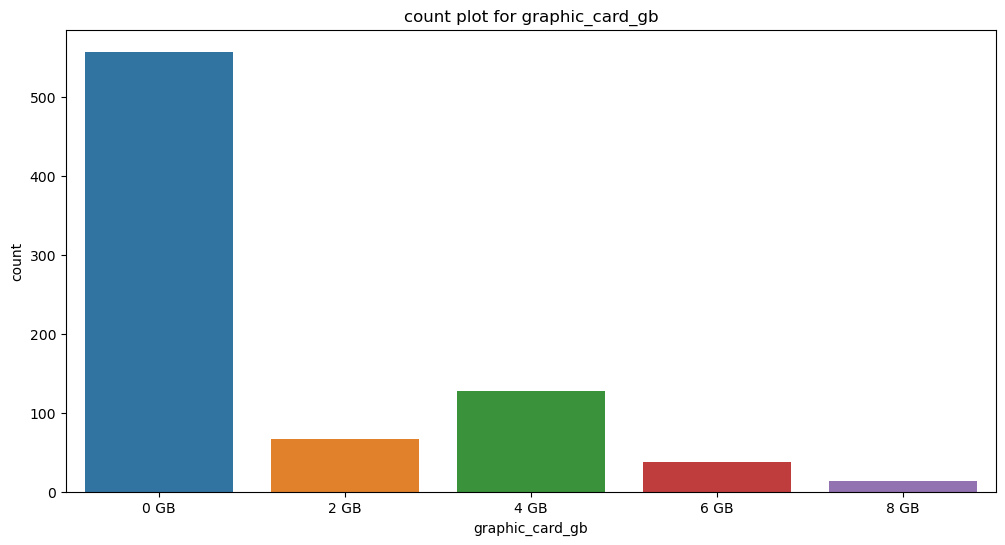

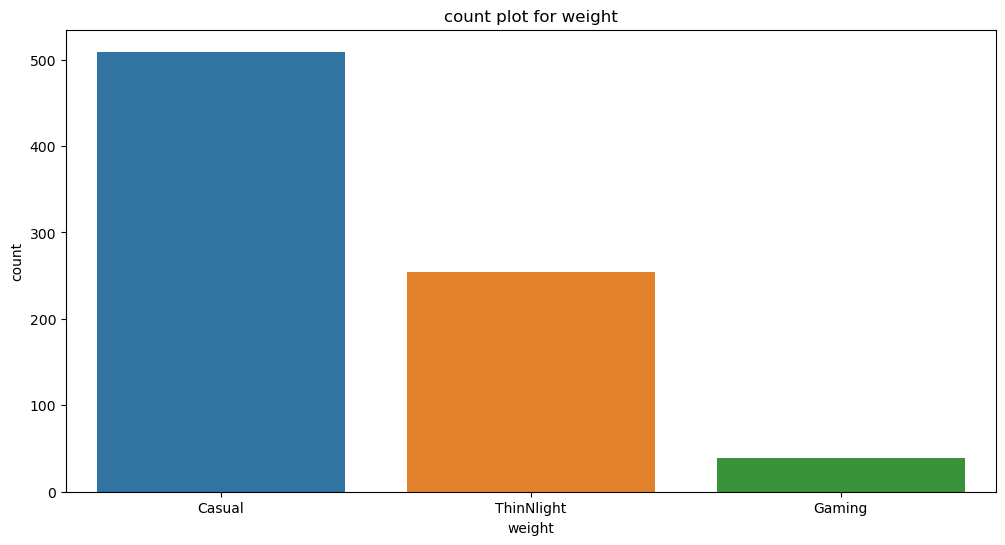

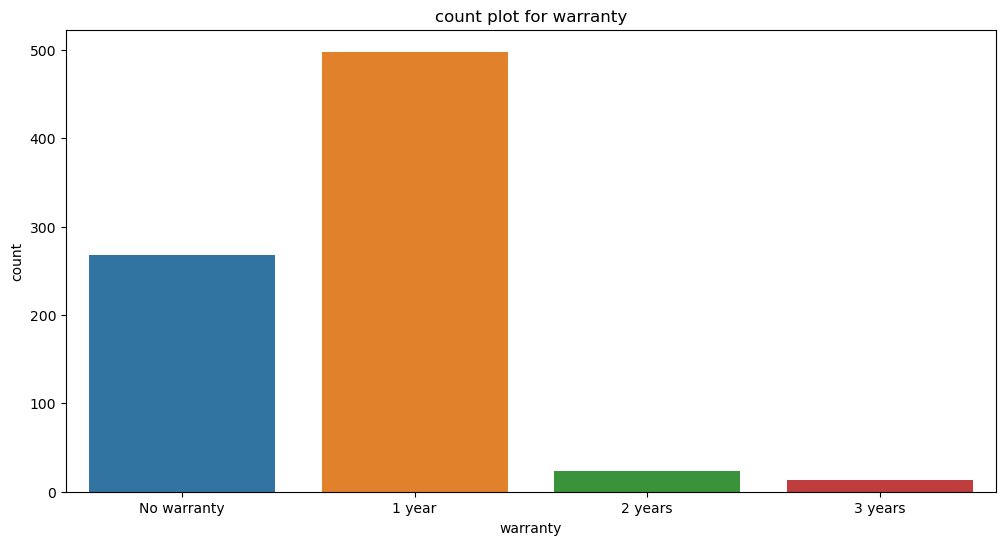

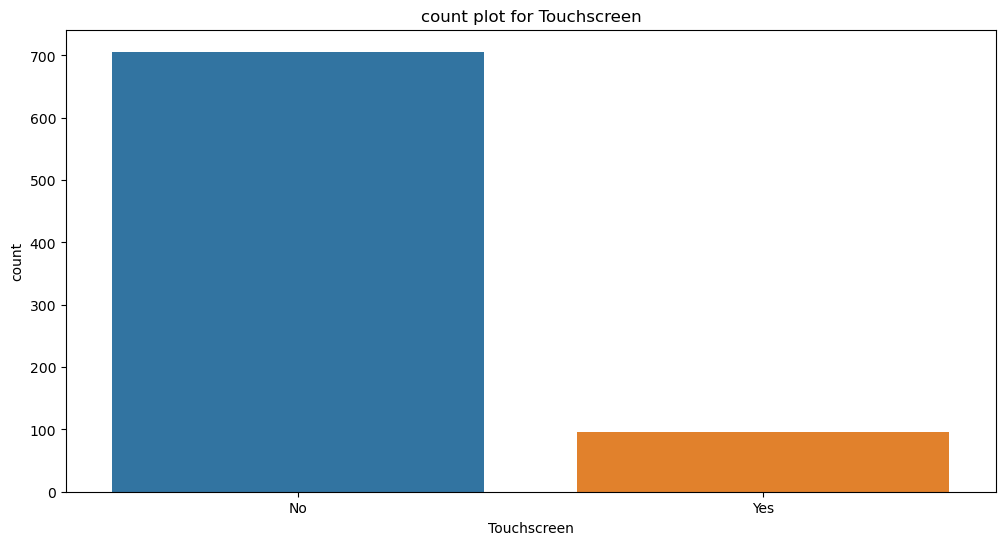

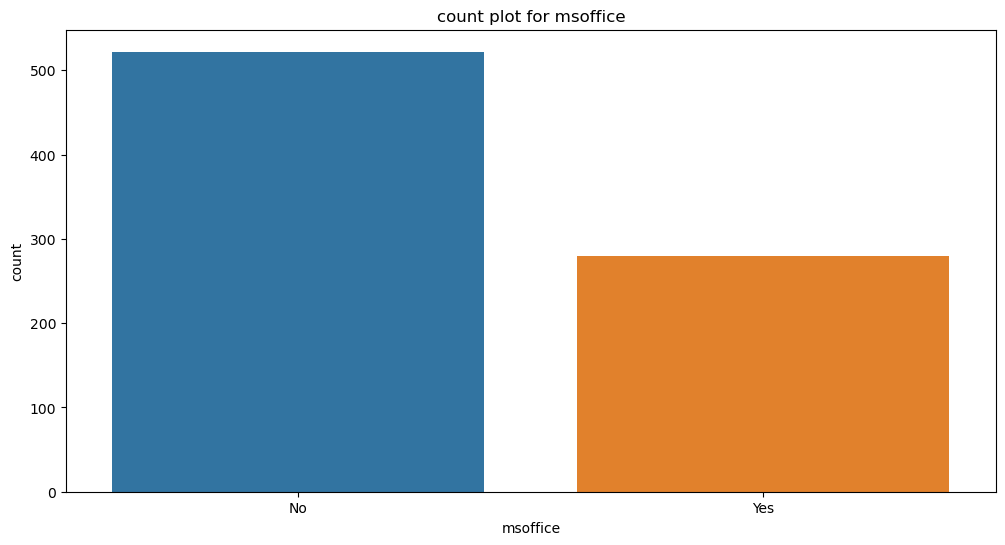

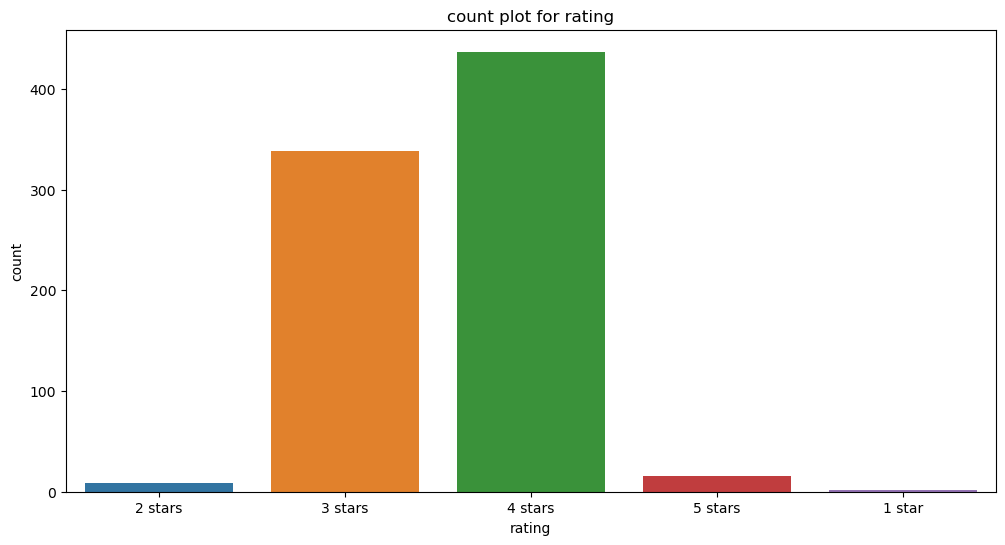

In [20]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df,x=i)
    plt.title(f'count plot for {i}')
    plt.show()

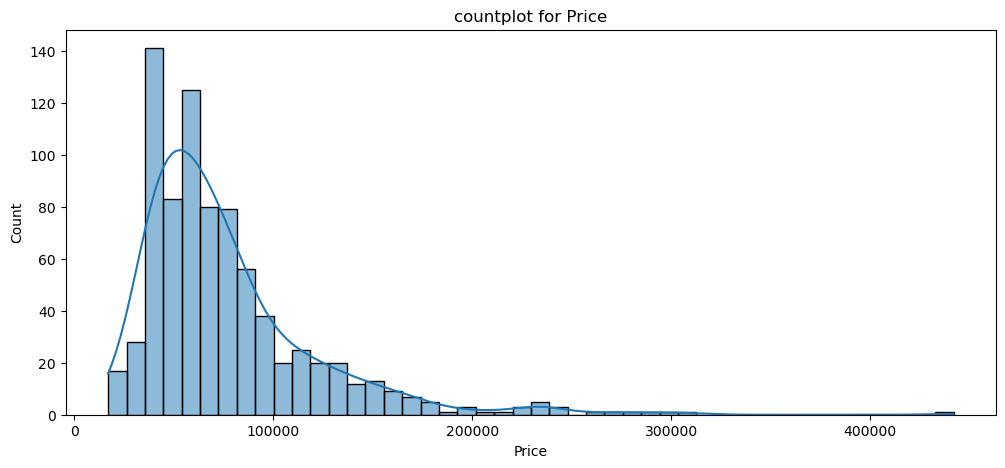

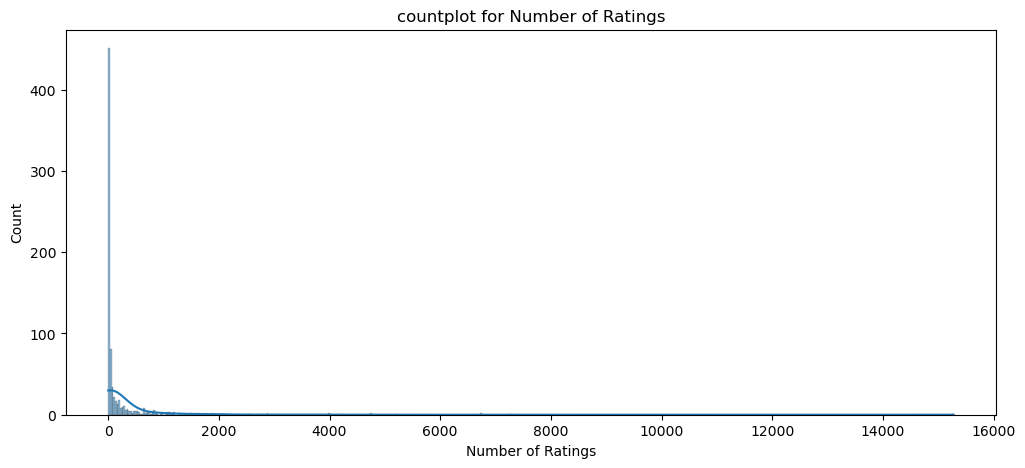

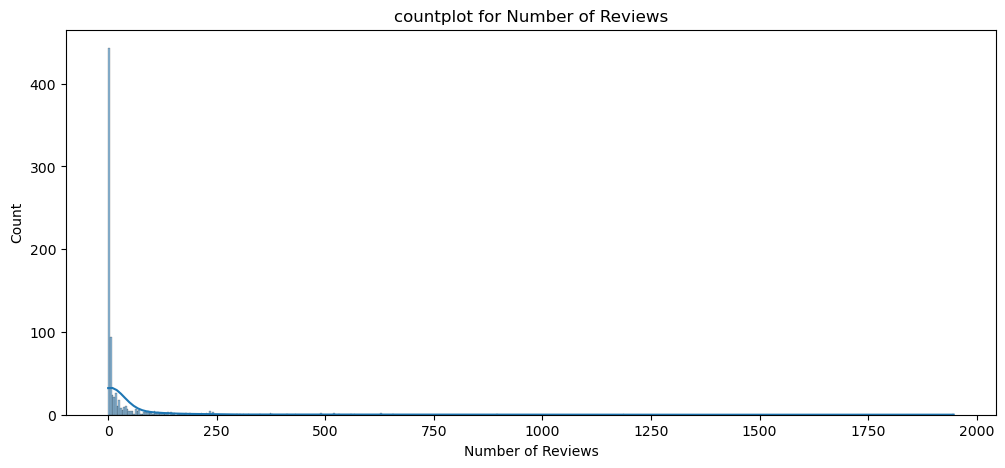

In [21]:
for i in con:
    plt.figure(figsize=(12,5))
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'countplot for {i}')
    plt.show()

### Multivariate analysis

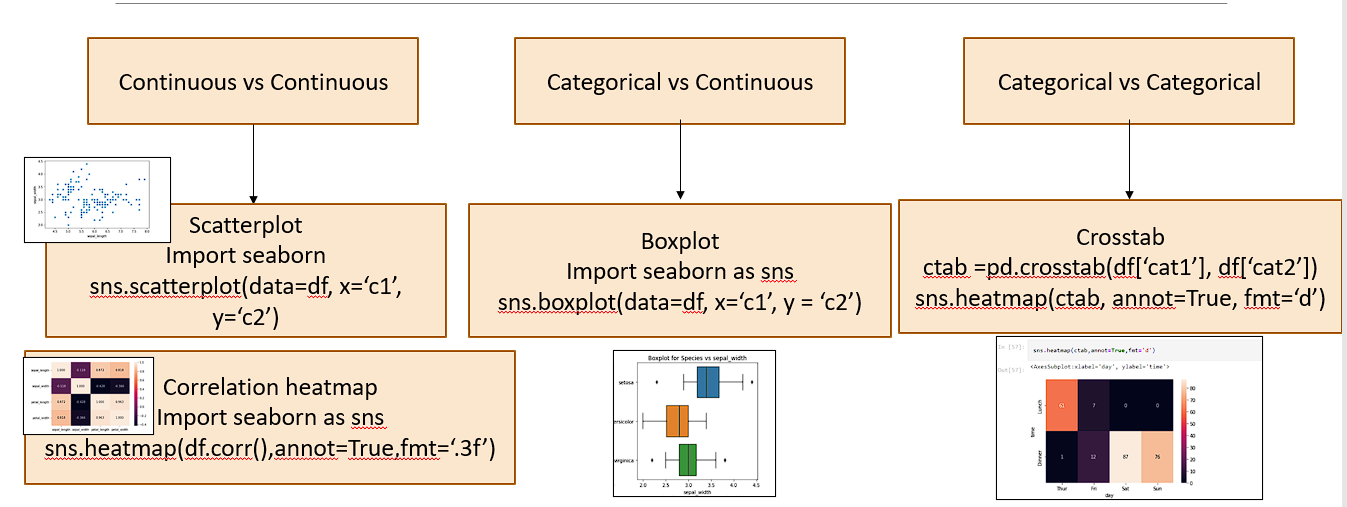

In [22]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

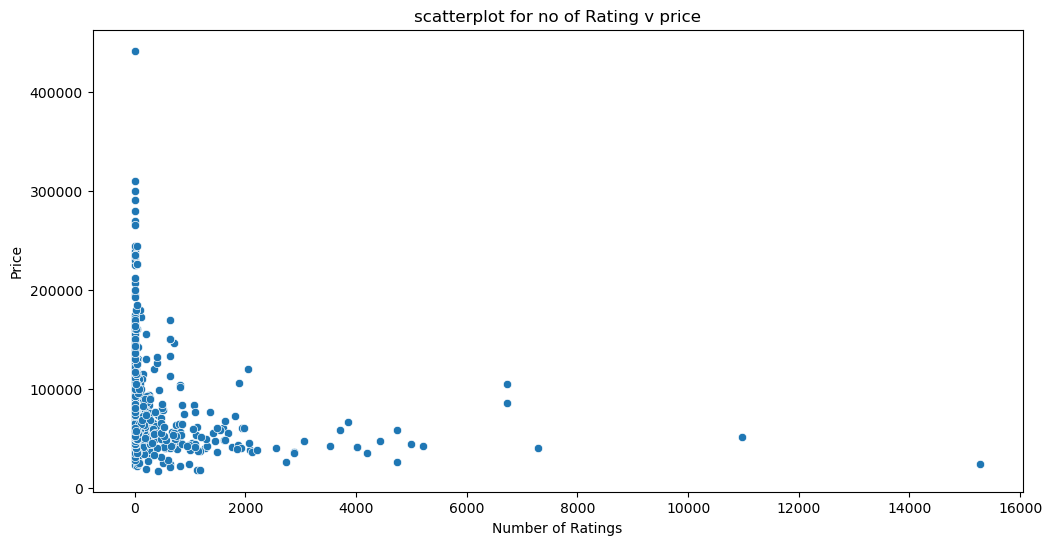

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Number of Ratings',y='Price')
plt.title(f'scatterplot for no of Rating v price')
plt.show()

Note : Number of ratings and Number of Reviews are Linearly dependent on each other

### Correlation Plot

In [24]:
cor = df[con].corr()

In [25]:
cor

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


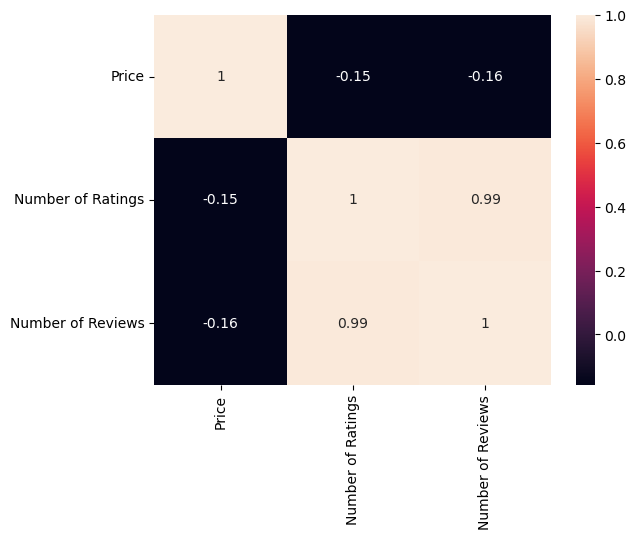

In [26]:
sns.heatmap(cor,annot=True)
plt.show()

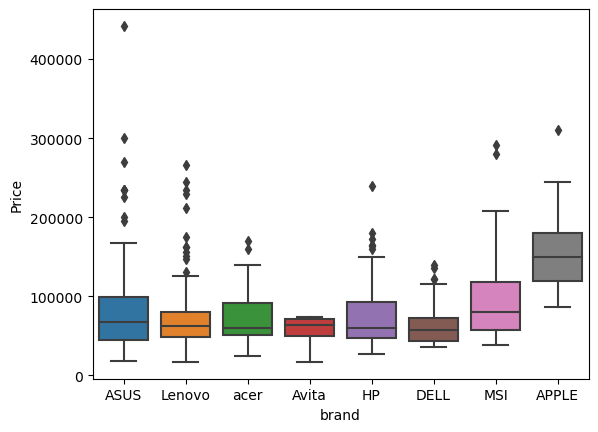

In [27]:
sns.boxplot(data=df,x='brand',y='Price')
plt.show()

In [28]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [29]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

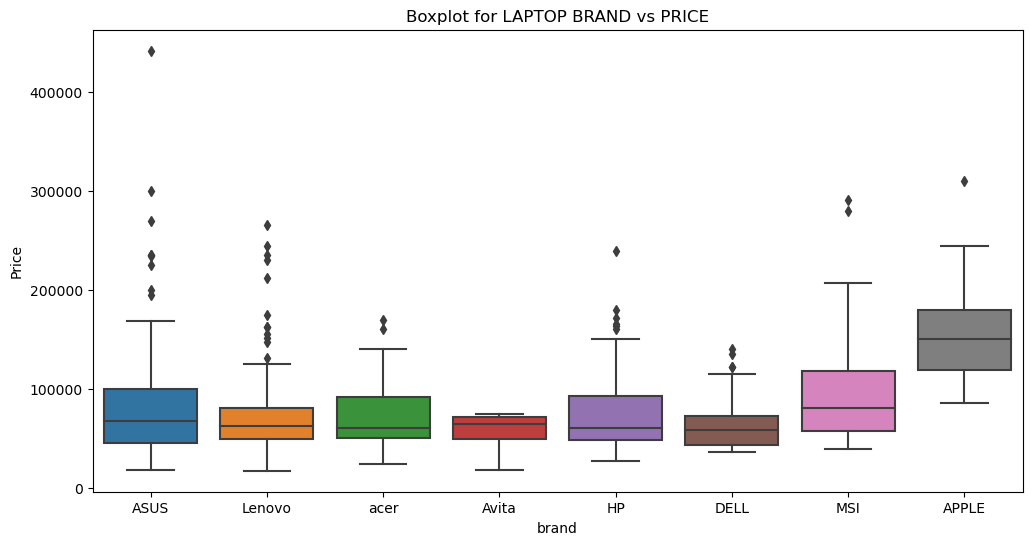

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='brand',y='Price')
plt.title(f'Boxplot for LAPTOP BRAND vs PRICE')
plt.show()

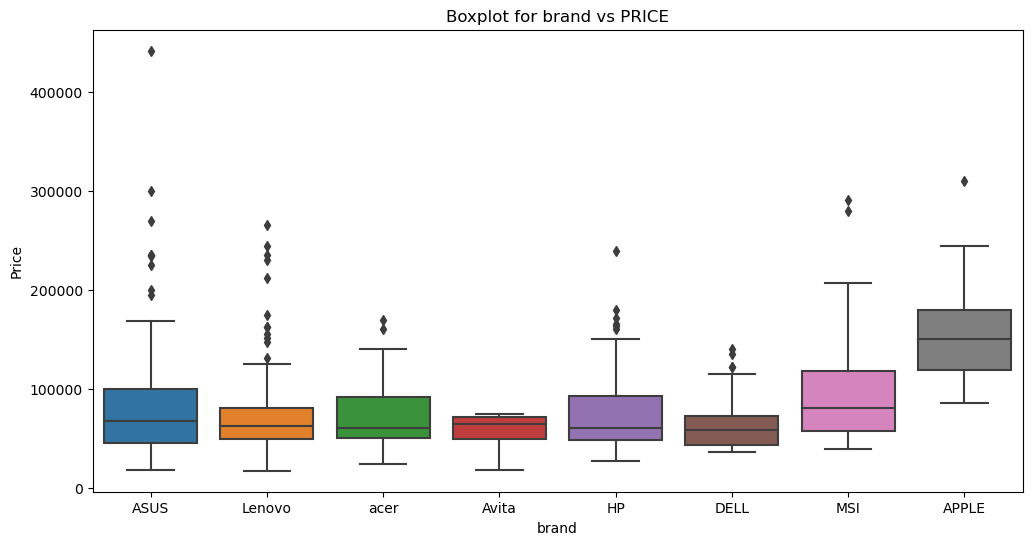

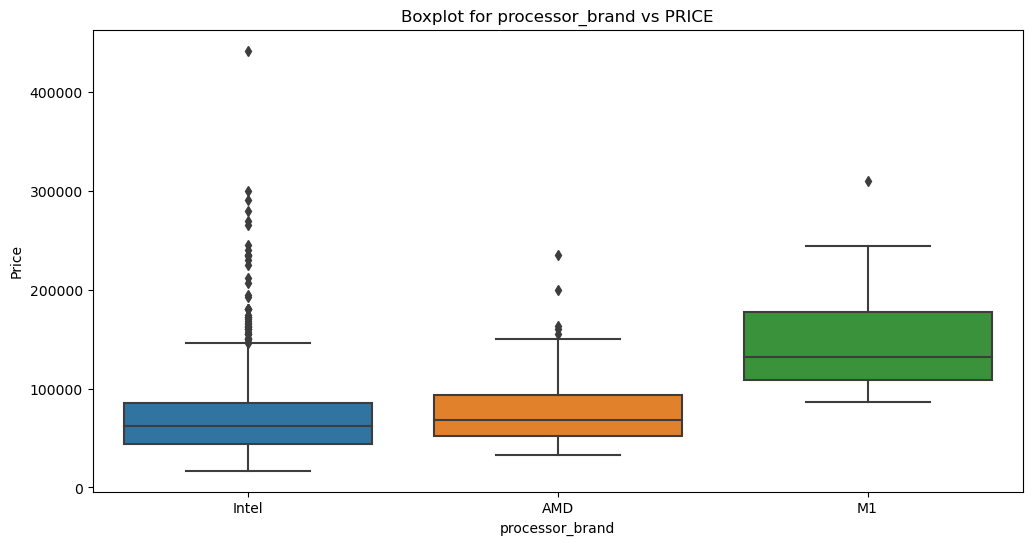

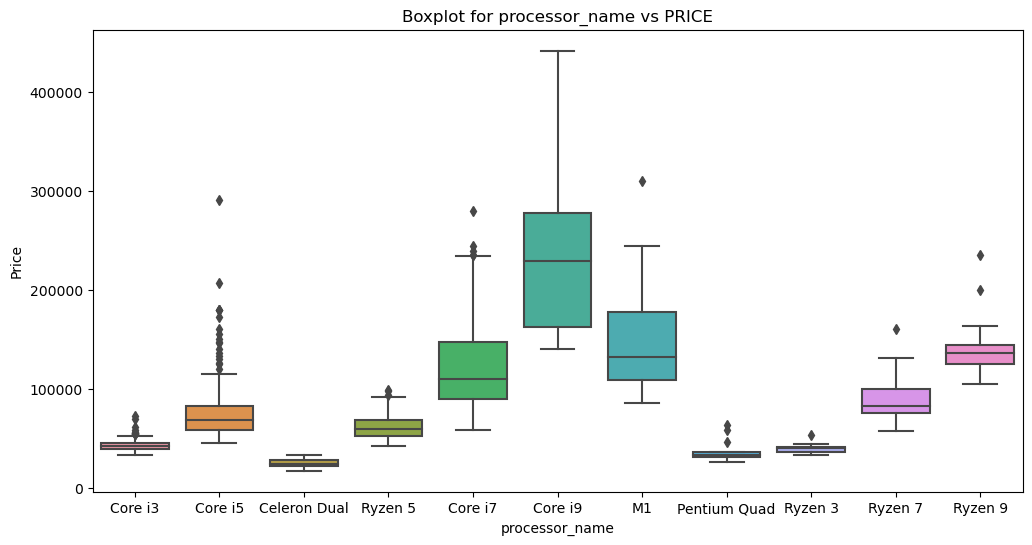

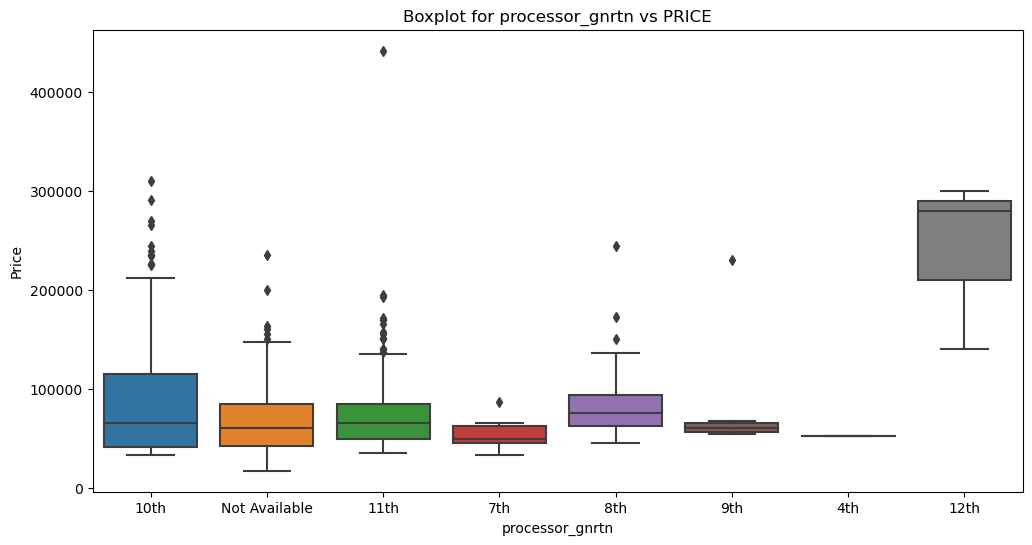

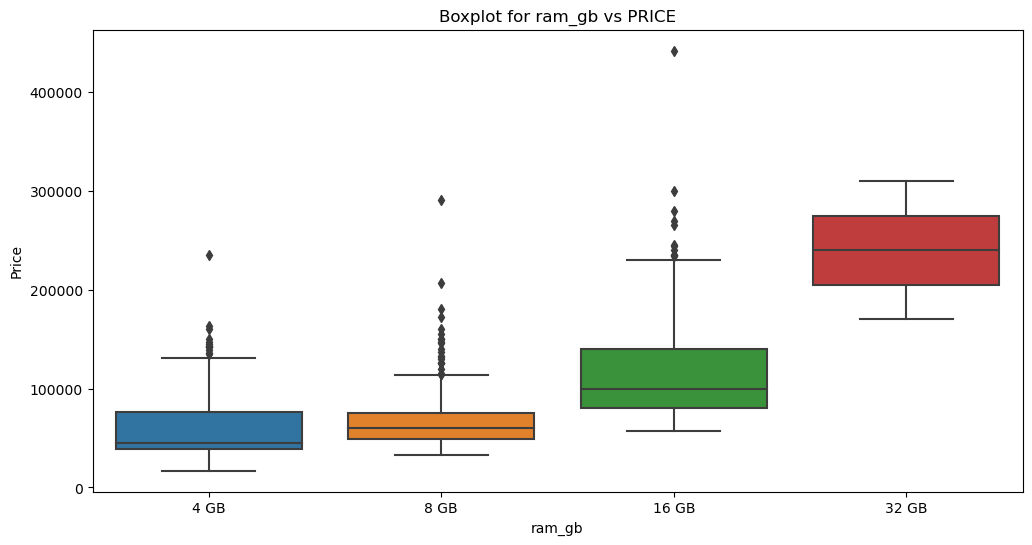

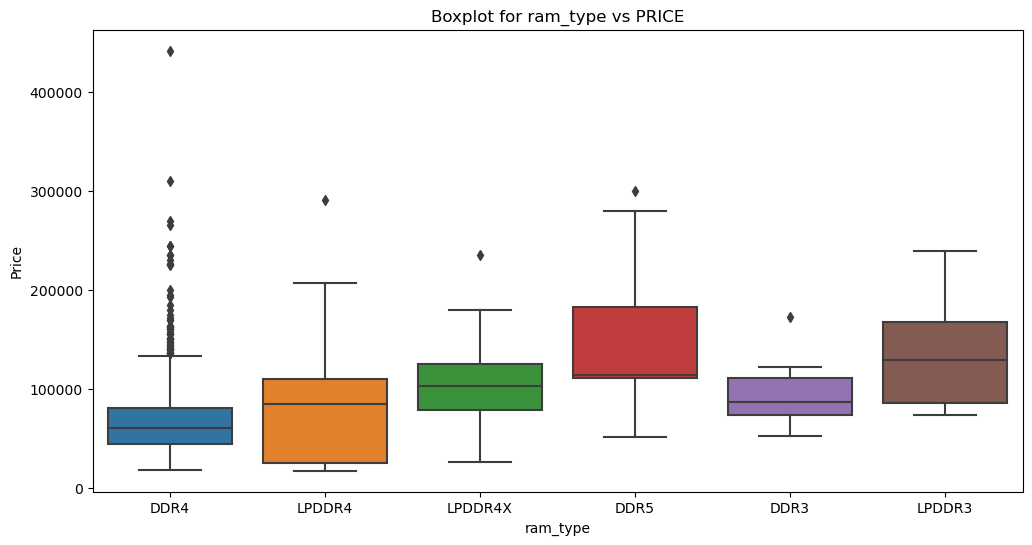

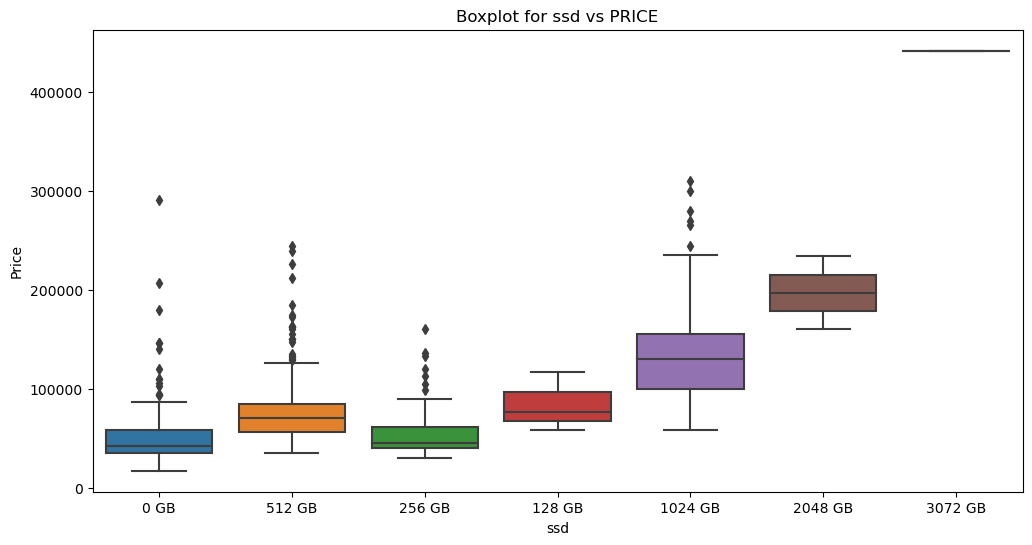

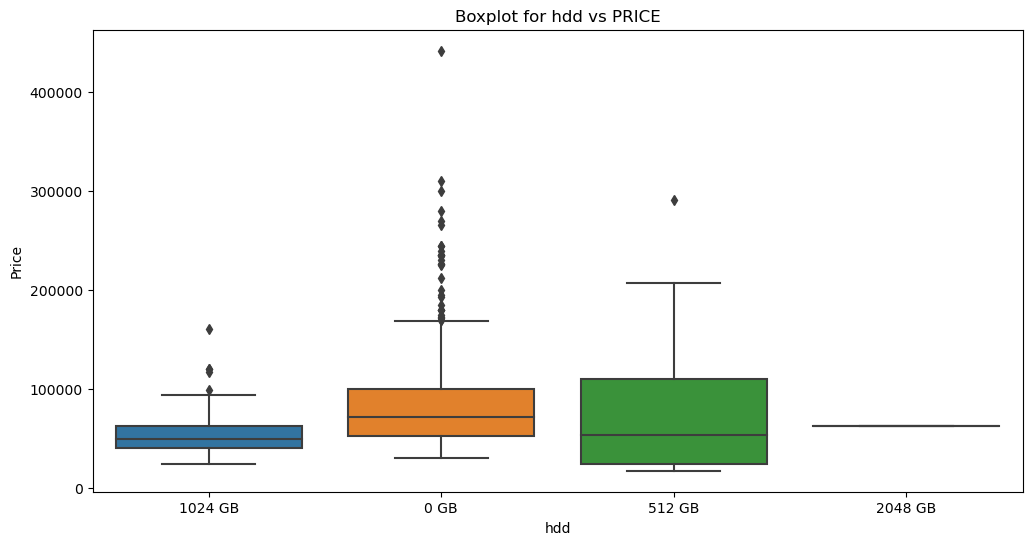

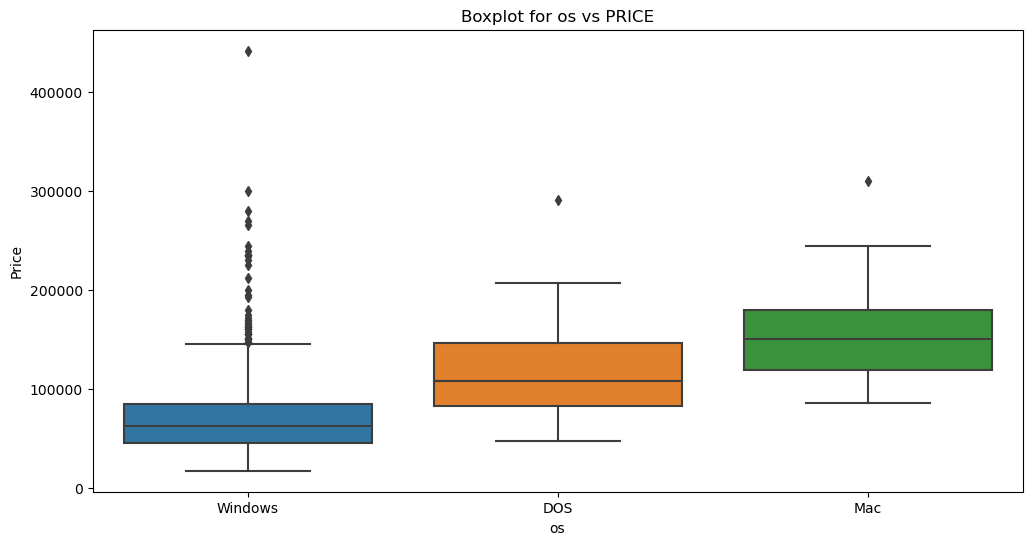

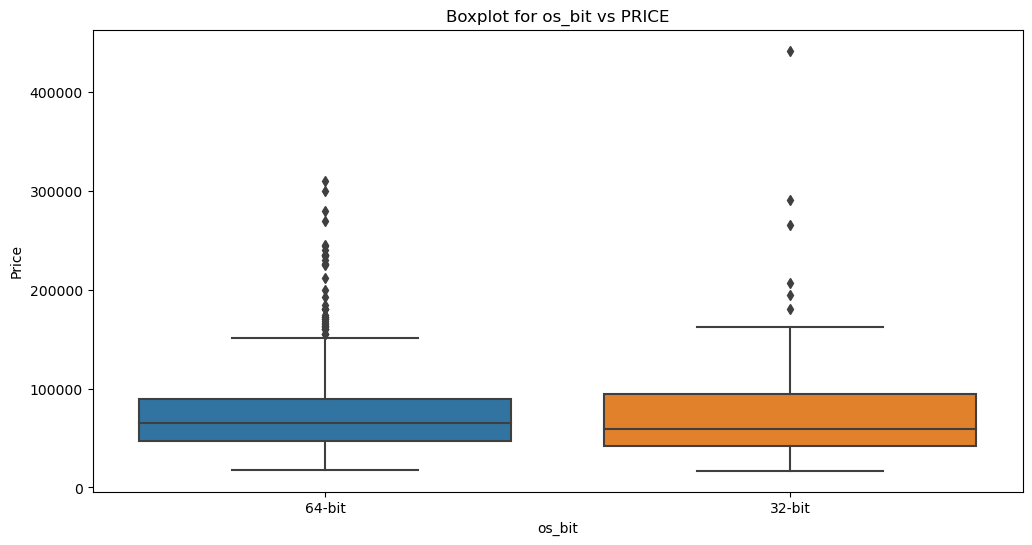

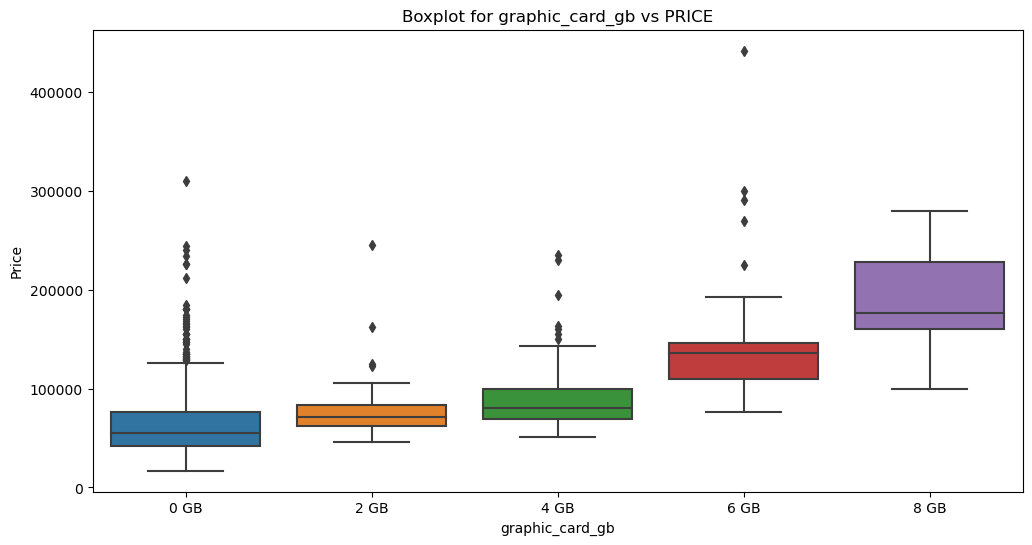

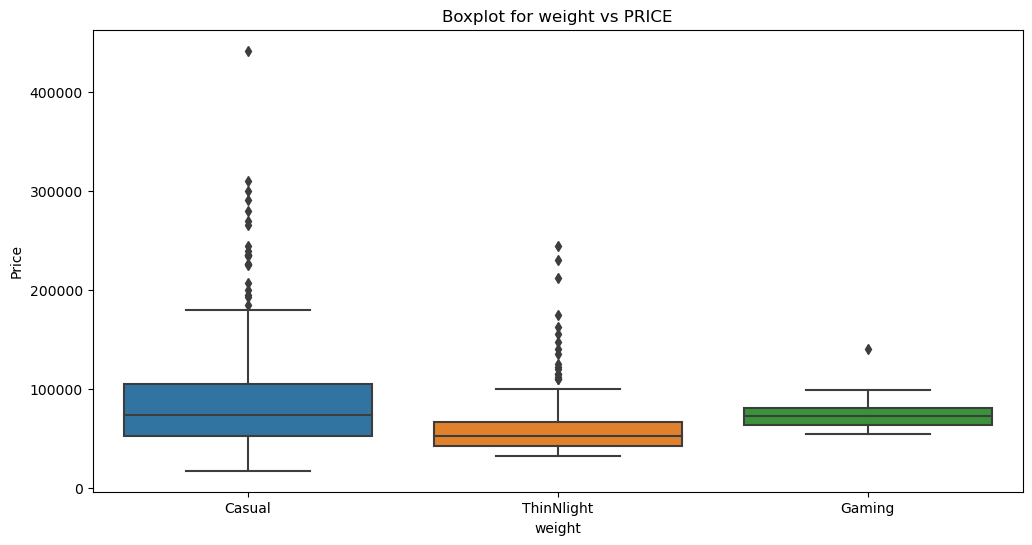

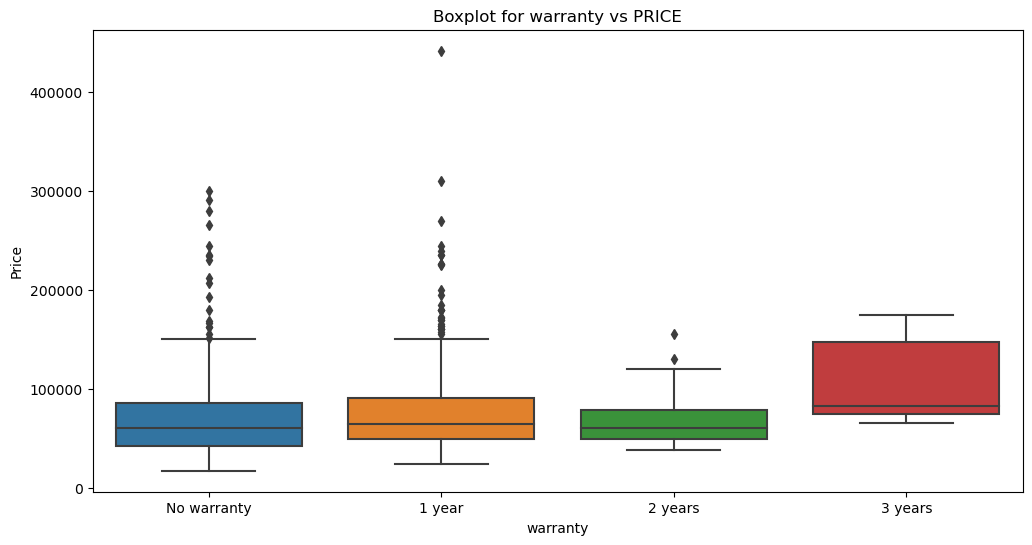

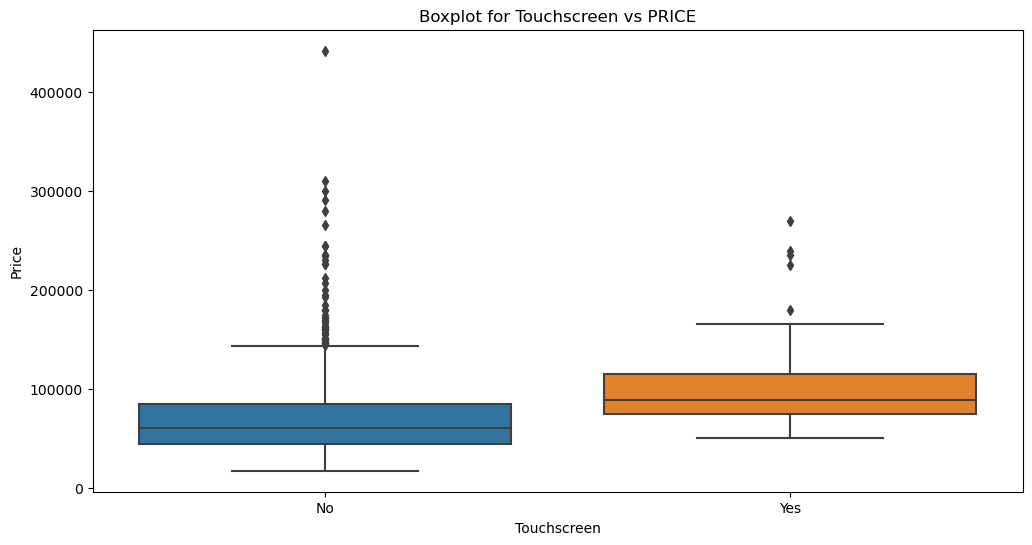

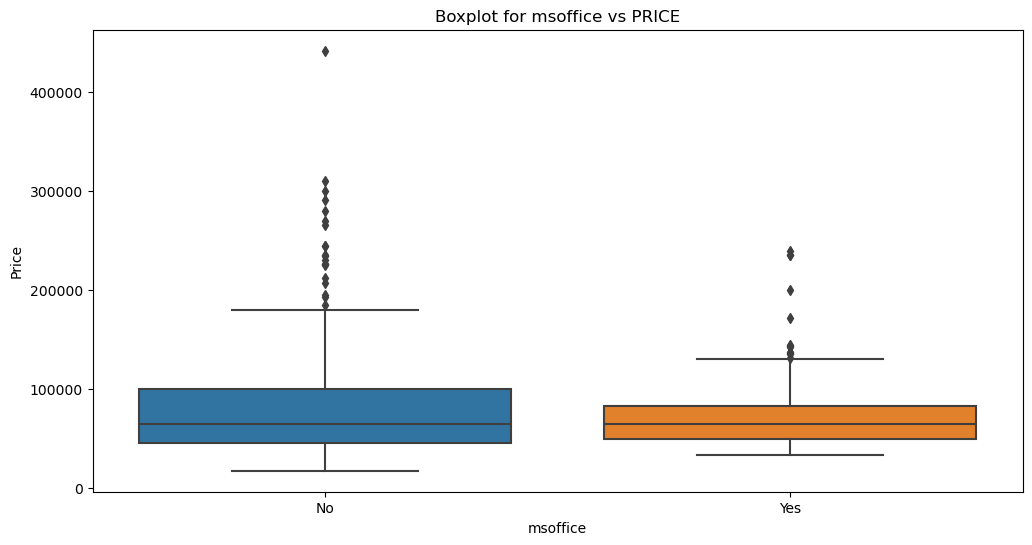

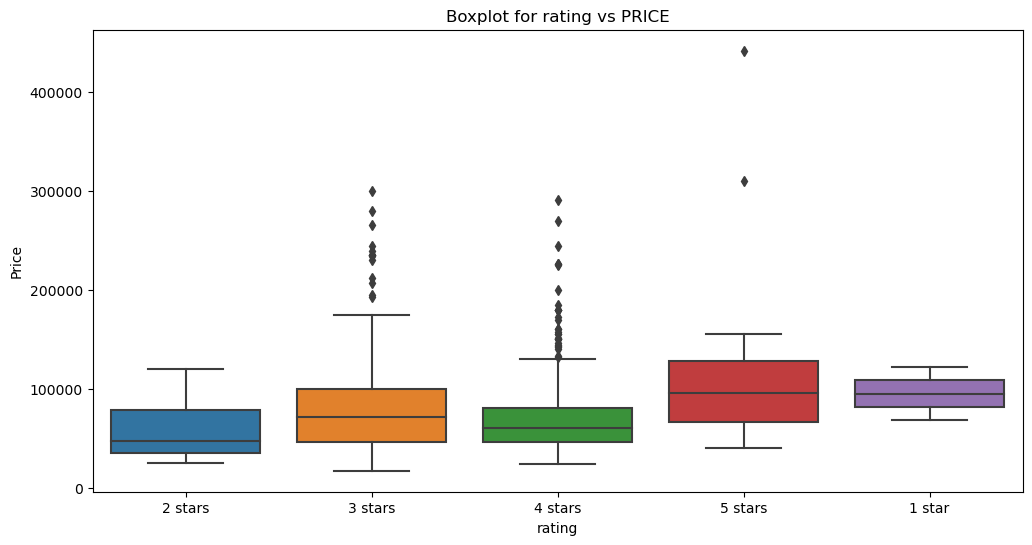

In [31]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df,x=i,y='Price')
    plt.title(f'Boxplot for {i} vs PRICE')
    plt.show()

### Cateogical vs Categorical - Crosstab heatmap

In [32]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [33]:
ctab1 = pd.crosstab(df['processor_brand'],df[ 'processor_gnrtn'])
ctab1

processor_gnrtn,10th,11th,12th,4th,7th,8th,9th,Not Available
processor_brand,,,,,,,,
AMD,4,0,0,0,0,0,0,185
Intel,175,328,3,1,7,35,6,39
M1,19,0,0,0,0,0,0,0


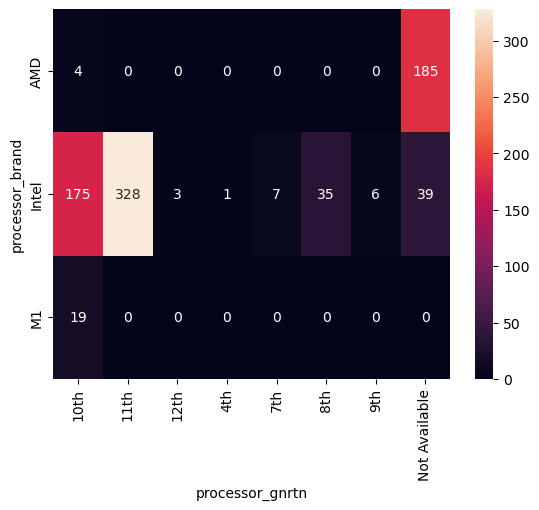

In [34]:
sns.heatmap(ctab1,annot=True, fmt='d')
plt.show()

In [35]:
ctab2 = pd.crosstab(df['brand'],df['rating'])
ctab2

rating,1 star,2 stars,3 stars,4 stars,5 stars
brand,,,,,
APPLE,0,0,0,22,1
ASUS,0,3,115,117,8
Avita,0,0,6,0,0
DELL,2,2,68,75,2
HP,0,1,44,88,3
Lenovo,0,3,67,72,2
MSI,0,0,16,34,0
acer,0,0,22,29,0


<Axes: xlabel='rating', ylabel='brand'>

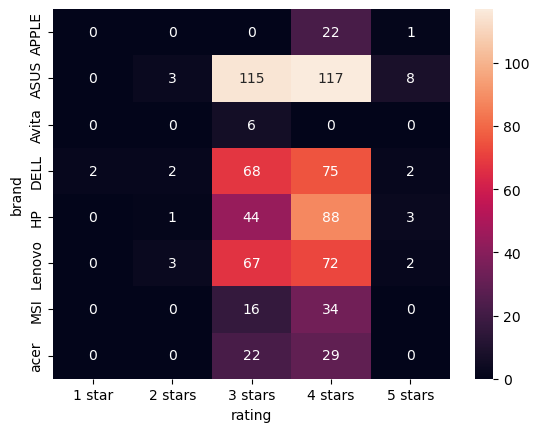

In [36]:
sns.heatmap(ctab2, annot=True, fmt='d')

### Multivarite analysis - Pairplot

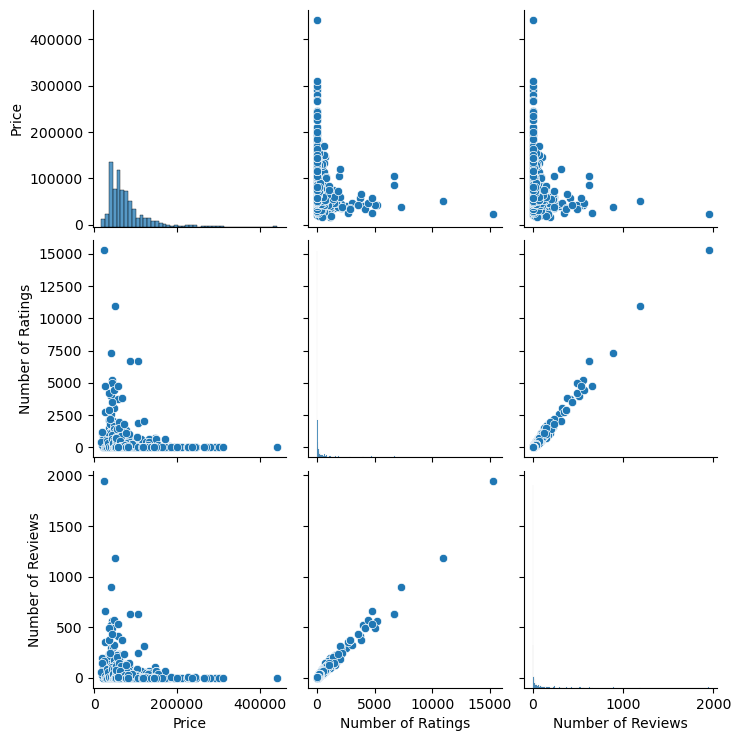

In [37]:
sns.pairplot(data=df)

In [38]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

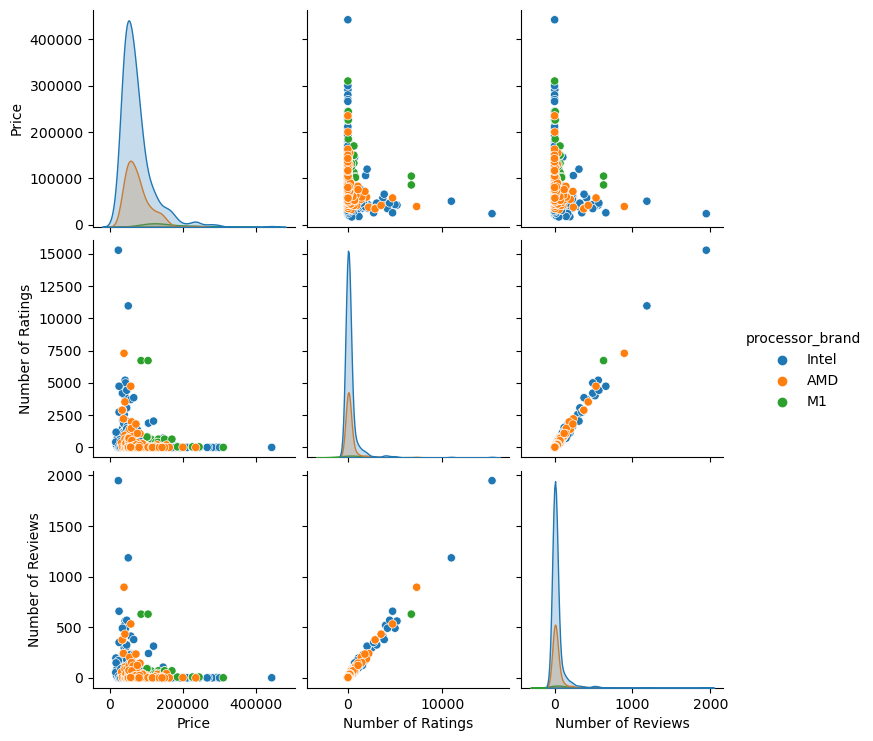

In [39]:
sns.pairplot(data=df,hue='processor_brand')
plt.show()

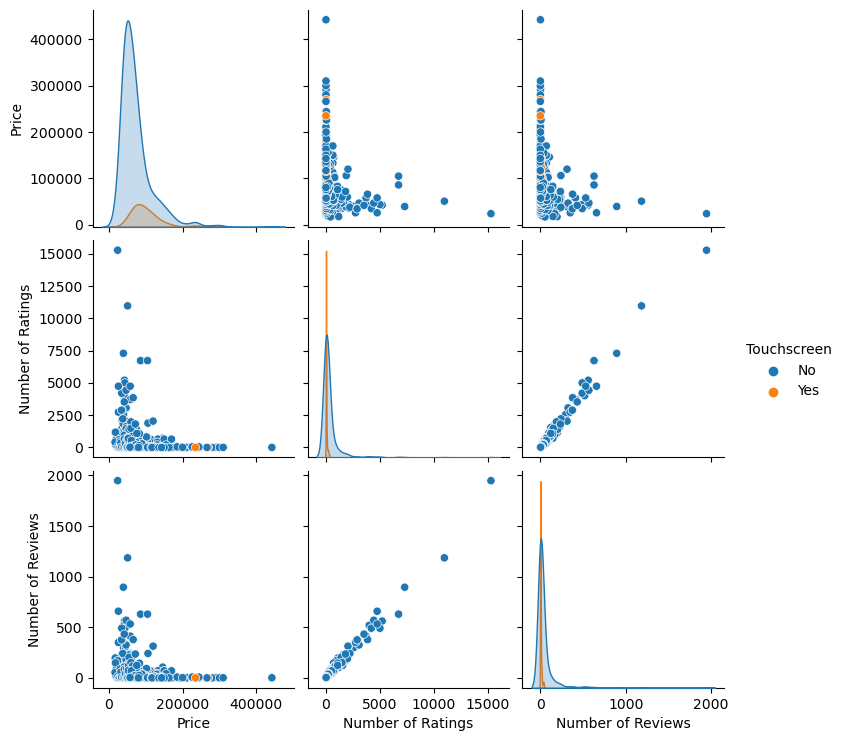

In [40]:
sns.pairplot(data=df,hue='Touchscreen')